# 2D plots
Demonstration of the 2D plot capabilities

The ``plot2d`` plot method make plots of 2-dimensional scalar data
using matplotlibs ``pcolormesh`` or the ``contourf`` functions.

Note that this method is extended by the [mapplot](http://psyplot.readthedocs.io/projects/psy-maps/en/latest/examples/example_mapplotters.html) plot method of the [psy-maps](http://psyplot.readthedocs.io/projects/psy-maps/en/latest/index.html) plugin for visualization on the projected globe.

In [1]:
import psyplot.project as psy
import xarray as xr
%matplotlib inline
%config InlineBackend.close_figures = False
import numpy as np

/Users/psommer/miniconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


First we create some sample data in the form of a 2D parabola

In [2]:
x = np.linspace(-1, 1.)
y = np.linspace(-1, 1.)
x2d, y2d = np.meshgrid(x, y)
z = - x2d**2 - y2d**2
ds = xr.Dataset(
    {'z': xr.Variable(('x', 'y'), z)},
    {'x': xr.Variable(('x', ), x), 'y': xr.Variable(('y', ), y)})

For a simple 2D plot of a scalar field, we can use the
[plot2d](http://psyplot.readthedocs.io/projects/psy-simple/en/latest/generated/psyplot.project.plot.plot2d.html#psyplot.project.plot.plot2d) plot method:

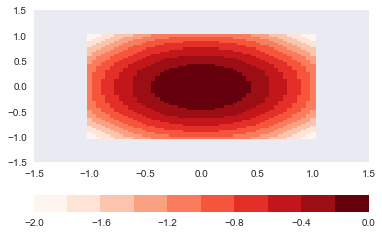

In [3]:
p = psy.plot.plot2d(ds, cmap='Reds', name='z')

The ``plot`` formatoption controls, how the plot is made. The default is a 
[pcolormesh](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pcolormesh) 
plot, but we can also make a 
[filled contour](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contourf) 
plot. The levels of the contour plot are determined through the ``levels`` formatoption.

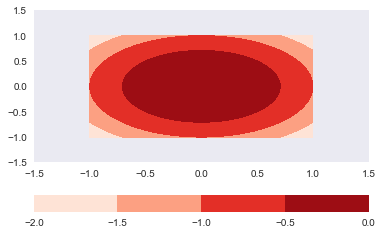

In [4]:
p.update(plot='contourf', levels=5)
p.show()

The ``plot2d`` method has several formatoptions controlling the color coding of your plot:

In [5]:
p.keys('colors')

+-------------+-------------+-------------+-------------+
| levels      | miss_color  | cmap        | bounds      |
+-------------+-------------+-------------+-------------+
| extend      | cbar        | cbarspacing | cticksize   |
+-------------+-------------+-------------+-------------+
| ctickweight | ctickprops  |             |             |
+-------------+-------------+-------------+-------------+


The most important ones are

- ``cbar``: To specify the location of the colorbar
- ``bounds``: To specify the boundaries for the color coding, i.e.
  the categories which data range belongs to which color
- ``cmap``: To specify the colormap

In [6]:
psy.close('all')